In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import  OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import  RobustScaler, StandardScaler
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import  RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error ,median_absolute_error 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import FunctionTransformer
import shap

In [2]:

import warnings
warnings.filterwarnings("ignore") # éviter d'afficher les alertes pythons
pd.options.display.float_format = '{:.5f}'.format

In [3]:
df_data = pd.read_feather('cleaned_data.feather')

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BuildingType                  1634 non-null   object 
 1   PrimaryPropertyType           1634 non-null   object 
 2   Neighborhood                  1634 non-null   object 
 3   YearBuilt                     1634 non-null   int64  
 4   NumberofBuildings             1634 non-null   float64
 5   NumberofFloors                1634 non-null   int64  
 6   PropertyGFAParking            1634 non-null   int64  
 7   PropertyGFABuilding(s)        1634 non-null   int64  
 8   LargestPropertyUseType        1634 non-null   object 
 9   SecondLargestPropertyUseType  1634 non-null   object 
 10  ThirdLargestPropertyUseType   1634 non-null   object 
 11  ENERGYSTARScore               1082 non-null   float64
 12  SiteEnergyUse(kBtu)           1634 non-null   float64
 13  Com

In [5]:
df_data.isna().mean()

BuildingType                   0.00000
PrimaryPropertyType            0.00000
Neighborhood                   0.00000
YearBuilt                      0.00000
NumberofBuildings              0.00000
NumberofFloors                 0.00000
PropertyGFAParking             0.00000
PropertyGFABuilding(s)         0.00000
LargestPropertyUseType         0.00000
SecondLargestPropertyUseType   0.00000
ThirdLargestPropertyUseType    0.00000
ENERGYSTARScore                0.33782
SiteEnergyUse(kBtu)            0.00000
ComplianceStatus               0.00000
TotalGHGEmissions              0.00000
VolumBuilding                  0.00000
RatioBuildingParking           0.00000
EnergyIndicator                0.00000
dtype: float64

In [6]:
numeric_col = df_data._get_numeric_data().columns.tolist()
numeric_col

['YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'VolumBuilding',
 'RatioBuildingParking',
 'EnergyIndicator']

In [7]:
numeric_col = [
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
# 'ENERGYSTARScore',
 'VolumBuilding',
 'RatioBuildingParking',
 'EnergyIndicator'
]

In [8]:
categ_col = df_data.select_dtypes(exclude=['int64','float64']).columns.tolist()
categ_col

['BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'ComplianceStatus']

In [9]:
categ_col = [#'PrimaryPropertyType',
 'Neighborhood',
 'LargestPropertyUseType',
   # 'BuildingType'
 'SecondLargestPropertyUseType',
 #'ThirdLargestPropertyUseType'
            ]

In [10]:
categ_col

['Neighborhood', 'LargestPropertyUseType', 'SecondLargestPropertyUseType']

In [11]:
var_to_predict = ['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']

# les prédictions de la variable : 'SiteEnergyUse(kBtu)'

In [12]:
X = df_data[numeric_col+categ_col]

In [13]:
X.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),VolumBuilding,RatioBuildingParking,EnergyIndicator
count,1634.00000,1634.00000,1634.00000,1634.00000,1634.00000,1634.00000,1634.00000,1634.00000
mean,1962.05875,1.13403,4.16769,13124.48531,100354.54590,1105989.48960,0.71724,0.99694
std,32.68529,1.14947,6.61735,42666.04920,171293.62289,5800210.38124,2.48210,0.05525
min,1900.00000,1.00000,1.00000,0.00000,3636.00000,7272.00000,0.00000,0.00000
25%,1930.00000,1.00000,1.00000,0.00000,28375.25000,48320.50000,0.00000,1.00000
50%,1966.00000,1.00000,2.00000,0.00000,47226.00000,105104.00000,0.00000,1.00000
75%,1989.00000,1.00000,4.00000,0.00000,94853.25000,340902.00000,0.00000,1.00000
max,2015.00000,27.00000,99.00000,512608.00000,2200000.00000,124094320.00000,64.43894,1.00000


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   YearBuilt                     1634 non-null   int64  
 1   NumberofBuildings             1634 non-null   float64
 2   NumberofFloors                1634 non-null   int64  
 3   PropertyGFAParking            1634 non-null   int64  
 4   PropertyGFABuilding(s)        1634 non-null   int64  
 5   VolumBuilding                 1634 non-null   int64  
 6   RatioBuildingParking          1634 non-null   float64
 7   EnergyIndicator               1634 non-null   int64  
 8   Neighborhood                  1634 non-null   object 
 9   LargestPropertyUseType        1634 non-null   object 
 10  SecondLargestPropertyUseType  1634 non-null   object 
dtypes: float64(2), int64(6), object(3)
memory usage: 140.5+ KB


In [15]:
y =  df_data['SiteEnergyUse(kBtu)']
#y = df_data['SiteEnergyUse(kBtu)'].apply(np.log1p)

In [16]:
y_dist= pd.qcut(df_data['SiteEnergyUse(kBtu)'],10)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2,stratify=y_dist)

Encodage des variables:
- one hot encoding,
- label encoder, 
- ordinal encoder,
- mean target encoding

In [18]:
target_encoder = TargetEncoder()
X_train[categ_col] = target_encoder.fit_transform(X_train[categ_col],y_train,smoothing=10)
X_train[categ_col]

,Neighborhood,LargestPropertyUseType,SecondLargestPropertyUseType
1070,12095644.26822,9901720.58750,5598428.79004
103,8847198.35525,6181352.93285,5598428.79004
513,5988339.65971,5646320.57095,7591019.83655
1002,4689323.24740,10015438.47035,13729183.16040
1127,5988339.65971,10015438.47035,5598428.79004
...,...,...,...
516,5988339.65971,4330878.50229,13729183.16040
1631,5874292.13858,10015438.47035,6814490.10131
81,4205019.35893,6181352.93285,5598428.79004
787,5988339.65971,2039419.60332,5598428.79004


In [19]:
X_test[categ_col]= target_encoder.transform(X_test[categ_col],y_test)
X_test[categ_col]

,Neighborhood,LargestPropertyUseType,SecondLargestPropertyUseType
1151,5988339.65971,2039419.60332,5481863.99692
594,5874292.13858,10015438.47035,5598428.79004
1621,4356450.95457,8919708.92732,5598428.79004
644,12095644.26822,5646320.57095,5598428.79004
681,6141389.10670,4330878.50229,5598428.79004
...,...,...,...
511,5988339.65971,5646320.57095,7591019.83655
523,10802110.69960,9901720.58750,5598428.79004
259,12095644.26822,4556026.40951,7591019.83655
1193,12616295.84717,2039419.60332,5598428.79004


In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test

array([[-0.25114817, -0.1228528 , -0.48049265, ..., -0.73704336,
        -1.06107747, -0.51744668],
       [-1.04476144,  1.81170874, -0.03446716, ..., -0.77437872,
         0.30378072, -0.49557693],
       [-0.40376611, -0.1228528 , -0.48049265, ..., -1.27126943,
         0.11627923, -0.49557693],
       ...,
       [-1.47209166, -0.1228528 , -0.03446716, ...,  1.26228499,
        -0.63043513, -0.12172932],
       [-1.44156807, -0.1228528 , -0.33181748, ...,  1.432729  ,
        -1.06107747, -0.49557693],
       [-0.49533687, -0.1228528 , -0.48049265, ..., -0.06323181,
        -0.6689625 , -0.49557693]])

## Modélisation

Les modeles utilisés: 
    -  une régression par la méthode Régression DummyRegressor 
    -  une régression par la méthode Régression LinearRegression
    -  une régression par la méthode Lasso
    -  une régression par la méthode Régression Ridge
    -  une régression par la méthode Random Forest
    -  une régression par la méthode XGBoost
    -  une régression par la méthode DecisionTree

les métrics de regression : 
    - R2
    - MAE (Mean Absolute Error)
    - MSE (Mean Square Error )

### Dummy Regression 

In [21]:
estimator_dummy = DummyRegressor(strategy = "mean") 

In [22]:
estimator_dummy.fit(X_train, y_train)

DummyRegressor()

In [23]:
y_pred = estimator_dummy.predict(X_test)
y_pred

array([8239769.88772604, 8239769.88772604, 8239769.88772604,
       8239769.88772604, 8239769.88772604, 8239769.88772604,
       8239769.88772604, 8239769.88772604, 8239769.88772604,
       8239769.88772604, 8239769.88772604, 8239769.88772604,
       8239769.88772604, 8239769.88772604, 8239769.88772604,
       8239769.88772604, 8239769.88772604, 8239769.88772604,
       8239769.88772604, 8239769.88772604, 8239769.88772604,
       8239769.88772604, 8239769.88772604, 8239769.88772604,
       8239769.88772604, 8239769.88772604, 8239769.88772604,
       8239769.88772604, 8239769.88772604, 8239769.88772604,
       8239769.88772604, 8239769.88772604, 8239769.88772604,
       8239769.88772604, 8239769.88772604, 8239769.88772604,
       8239769.88772604, 8239769.88772604, 8239769.88772604,
       8239769.88772604, 8239769.88772604, 8239769.88772604,
       8239769.88772604, 8239769.88772604, 8239769.88772604,
       8239769.88772604, 8239769.88772604, 8239769.88772604,
       8239769.88772604,

In [24]:
baseline_results =[]
r2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
MedAE = median_absolute_error(y_test, y_pred)

baseline_results.append([r2,MAE,MSE,RMSE,MedAE])
baseline= pd.DataFrame(baseline_results, columns=["R2",'MAE','MSE','RMSE','MedAE'], index=['dummyRegressor'])
baseline

,R2,MAE,MSE,RMSE,MedAE
dummyRegressor,-0.00225,8027960.69774,351592759748737.25000,18750806.90927,6401732.11227


### Recherche d'hyperparamètres

#### LinearRegression

Hyperparamètre de LinearRegression : 

- fit_intercept :  S'il faut calculer l'ordonnée à l'origine pour ce modèle. Si False, aucune interception ne sera utilisée dans les calculs (c'est-à-dire que les données doivent être centrées).
- copy_X:  Si True, X sera copié ; sinon, il peut être écrasé.

In [25]:
def apply_LinearRegression(X_train, y_train, X_test, y_test):

    estimator_LR = LinearRegression()
    params_lr = {
            'fit_intercept':[True,False], 
                           }
    grid_LR = GridSearchCV(estimator = estimator_LR, param_grid = params_lr,return_train_score=True , n_jobs = -1)
    grid_LR.fit(X_train, y_train)
    print(f" Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement pour {estimator_LR}: ",grid_LR.best_params_ )
    y_pred_lr = grid_LR.best_estimator_.predict(X_test)
   
    #y_test = np.expm1(y_test)
    #y_pred_lr = np.expm1(y_pred_lr)
    print("R2 = {:.3f}".format(r2_score(y_test, y_pred_lr)))
    print("MSE = {:.3f}".format(mean_squared_error(y_test, y_pred_lr)))
    return grid_LR

In [26]:
grid_LR = apply_LinearRegression(X_train, y_train, X_test, y_test)

 Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement pour LinearRegression():  {'fit_intercept': True}
R2 = 0.685
MSE = 110537463560438.188


In [27]:
def apply_LinearRegression_best_params(grid,X_train, y_train, X_test, y_test):
    LR = LinearRegression(**grid.best_params_)
    reg = LR.fit(X_train, y_train)
    y_pred_lr = reg.predict(X_test)
    print("R2 = {:.3f}".format(r2_score(y_test, y_pred_lr)))
    print("MSE = {:.3f}".format(mean_squared_error(y_test, y_pred_lr)))
    return reg

In [28]:
lr = apply_LinearRegression_best_params(grid_LR,X_train, y_train, X_test, y_test)

R2 = 0.685
MSE = 110537463560438.188


In [29]:
def plot_coef(grid,X):
    importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': grid.coef_ # abs 
    })
    importances = importances.sort_values(by='Importance', ascending=False)
    plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
    plt.title('Feature importances obtained from coefficients', size=20)
    plt.xticks(rotation='vertical')
    plt.show()

In [30]:
#plot_coef(lr,X)

#### LASSO

Hyperparamètre : Estimation de alpha
    
- alpha: Constante qui multiplie le terme L1, contrôlant la force de régularisation

In [31]:
def apply_LASSO(X_train, y_train, X_test, y_test):
    estimator_lasso =  Lasso(random_state = 2)
    params_lasso = {'alpha': np.logspace(-5, 5, 50)}
    grid_lasso = GridSearchCV(estimator = estimator_lasso, param_grid = params_lasso,return_train_score=True, n_jobs = -1)
    grid_lasso.fit(X_train, y_train)
    print(f" Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement pour {estimator_lasso}: ",grid_lasso.best_params_ )
    y_pred_lasso = grid_lasso.best_estimator_.predict(X_test)
    #y_test = np.expm1(y_test)
    #y_pred_lasso = np.expm1(y_pred_lasso)
    print("R2 = {:.3f}".format(r2_score(y_test, y_pred_lasso)))
    print("MSE = {:.3f}".format(mean_squared_error(y_test, y_pred_lasso)))
    return grid_lasso

In [32]:
grid_lasso = apply_LASSO(X_train, y_train, X_test, y_test)

 Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement pour Lasso(random_state=2):  {'alpha': 100000.0}
R2 = 0.687
MSE = 109741444071089.250


In [33]:
def apply_LASSO_best_params(grid,X_train, y_train, X_test, y_test):
    LR = Lasso(**grid.best_params_,random_state=42)
    reg = LR.fit(X_train, y_train)
    y_pred_lr = reg.predict(X_test)
    print("R2 = {:.3f}".format(r2_score(y_test, y_pred_lr)))
    print("MSE = {:.3f}".format(mean_squared_error(y_test, y_pred_lr)))
    return reg

In [34]:
lasso = apply_LASSO_best_params(grid_lasso,X_train, y_train, X_test, y_test)

R2 = 0.687
MSE = 109741444071089.250


#### Ridge

Hyperparamètre : Estimation de alpha

- alpha: Constante qui multiplie le terme L2, contrôlant la force de régularisation.

In [35]:
def apply_ridge(X_train, y_train, X_test, y_test):
    estimator_ridge =  Ridge(random_state = 2)
    params_ridge = {   'alpha': np.logspace(-5, 4, 50)}
    grid_ridge = GridSearchCV(estimator = estimator_ridge, param_grid = params_ridge,return_train_score=True ,n_jobs = -1)
    grid_ridge.fit(X_train, y_train)
    print(f" Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement pour {estimator_ridge}: ",grid_ridge.best_params_ )
    y_pred_ridge = grid_ridge.best_estimator_.predict(X_test)
    #y_test = np.expm1(y_test)
    #y_pred_ridge = np.expm1(y_pred_ridge)
    print("R2 = {:.3f}".format(r2_score(y_test, y_pred_ridge)))
    print("MSE = {:.3f}".format(mean_squared_error(y_test, y_pred_ridge)))
    return grid_ridge

In [36]:
grid_ridge = apply_ridge(X_train, y_train, X_test, y_test)

 Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement pour Ridge(random_state=2):  {'alpha': 145.63484775012444}
R2 = 0.657
MSE = 120422341884206.219


In [37]:
def apply_Ridge_best_params(grid,X_train, y_train, X_test, y_test):
    LR = Ridge(**grid.best_params_,random_state=2)
    reg = LR.fit(X_train, y_train)
    y_pred_lr = reg.predict(X_test)
    print("R2 = {:.3f}".format(r2_score(y_test, y_pred_lr)))
    print("MSE = {:.3f}".format(mean_squared_error(y_test, y_pred_lr)))
    return reg

In [38]:
ridge= apply_Ridge_best_params(grid_ridge,X_train, y_train, X_test, y_test)

R2 = 0.657
MSE = 120422341884206.219


#### Decision Tree

Hyperparamètre : max_depth,min_samples_split,criterion
    
- criterion:La fonction pour mesurer la qualité d'une division.
- max_depth:La profondeur maximale de l'arbre
- min_samples_split:Le nombre minimum d'échantillons requis pour diviser un nœud interne

In [39]:
def apply_DTree(X_train, y_train, X_test, y_test):
    estimator_DTree =  DecisionTreeRegressor(random_state = 2)
    params_DTree={
        'criterion': ["mse", "msa"],
        'max_depth': range(2, 30), # It denotes the tree’s maximum depth.
        'min_samples_split': [2,3,4,5],
        #'splitter': ['best','random']
    }
    grid_DTree = GridSearchCV(estimator = estimator_DTree, param_grid = params_DTree,return_train_score=True, n_jobs = -1)
    grid_DTree.fit(X_train, y_train)
    print(f" Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement pour {estimator_DTree}: ",grid_DTree.best_params_ )
    y_pred_DTree = grid_DTree.best_estimator_.predict(X_test) 
    #y_test = np.expm1(y_test)
    #y_pred_DTree = np.expm1(y_pred_DTree)
    print("R2 = {:.3f}".format(r2_score(y_test, y_pred_DTree)))
    print("MSE = {:.3f}".format(mean_squared_error(y_test, y_pred_DTree)))
    return grid_DTree

In [40]:
grid_DTree = apply_DTree(X_train, y_train, X_test, y_test)

 Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement pour DecisionTreeRegressor(random_state=2):  {'criterion': 'mse', 'max_depth': 5, 'min_samples_split': 4}
R2 = 0.879
MSE = 42562214318488.023


In [41]:
def apply_DTree_best_params(grid,X_train, y_train, X_test, y_test):
    LR = DecisionTreeRegressor(**grid.best_params_,random_state=2)
    reg = LR.fit(X_train, y_train)
    y_pred_lr = reg.predict(X_test)
    print("R2 = {:.3f}".format(r2_score(y_test, y_pred_lr)))
    print("MSE = {:.3f}".format(mean_squared_error(y_test, y_pred_lr)))
    return reg

In [42]:
DTree = apply_DTree_best_params(grid_DTree,X_train, y_train, X_test, y_test)

R2 = 0.879
MSE = 42562214318488.023


In [43]:
def plot_feature_importance(grid,X):
    importances = grid.feature_importances_
    features = X.columns
    indices = np.argsort(importances)
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

In [44]:
#plot_feature_importance(DTree,X)

#### Random Forest #

Hyperparamètre :'max_features','max_depth','criterion',

- criterion: La fonction pour mesurer la qualité d'une division.Les critères pris en charge sont "squared_error" pour l'erreur quadratique moyenne, qui est égale à la réduction de la variance en tant que critère de sélection des caractéristiques et minimise la perte L2 en utilisant la moyenne de chaque nœud terminal,"absolute_error" pour l'erreur absolue moyenne, qui minimise la perte L1 en utilisant la médiane de chaque nœud terminal.
- max_features: Le nombre de variables à prendre en compte lors de la recherche de la meilleure répartition.
- max_depth: nombre maximum de niveaux dans chaque arbre de décision (profondeur).


In [45]:
def apply_Rforest(X_train, y_train, X_test, y_test):

    estimator_Rforest = RandomForestRegressor(random_state=2)
    params_Rforest = {
     #   'n_estimators': [100,200,250],
        'criterion' : ['mse', 'msa'],
        'max_features':[1.0, 'sqrt', 'log2'],
        'max_depth':range(2, 25)
    }
    grid_Rforest = GridSearchCV(estimator = estimator_Rforest, param_grid = params_Rforest,return_train_score=True,n_jobs = -1)
    grid_Rforest.fit(X_train, y_train)
    print(f" Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement pour {estimator_Rforest}: ",grid_Rforest.best_params_ )
    y_pred_Rforest = grid_Rforest.best_estimator_.predict(X_test)
    #y_test = np.exp(y_test)
    #y_pred_Rforest = np.exp(y_pred_Rforest)
    print("R2 = {:.3f}".format(r2_score(y_test, y_pred_Rforest)))
    print("MSE = {:.3f}".format(mean_squared_error(y_test, y_pred_Rforest)))
    return grid_Rforest

In [46]:
grid_Rforest = apply_Rforest(X_train, y_train, X_test, y_test)

 Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement pour RandomForestRegressor(random_state=2):  {'criterion': 'mse', 'max_depth': 4, 'max_features': 1.0}
R2 = 0.850
MSE = 52592470243828.156


In [47]:
def apply_RForest_best_params(grid,X_train, y_train, X_test, y_test):
    LR = RandomForestRegressor(**grid.best_params_,random_state=2)
    reg = LR.fit(X_train, y_train)
    y_pred_lr = reg.predict(X_test)
    print("R2 = {:.3f}".format(r2_score(y_test, y_pred_lr)))
    print("MSE = {:.3f}".format(mean_squared_error(y_test, y_pred_lr)))
    return reg

In [48]:
RForest = apply_RForest_best_params(grid_Rforest,X_train, y_train, X_test, y_test)

R2 = 0.850
MSE = 52592470243828.156


In [49]:
#plot_feature_importance(RForest,X)

#### XGBOOST

In [50]:
def apply_XGboost(X_train, y_train, X_test, y_test):
    estimator_XGboost =  XGBRegressor(random_state = 2)
    params_XGboost={
        'max_depth':[2,3,4,5],
        'learning_rate':[1e-3, 1e-2, 1e-1, 1],
       'reg_alpha' :np.logspace(-3, 5, 10),
       'reg_lambda' : np.logspace(-3, 2, 5)
    }
    grid_XGboost = GridSearchCV(estimator = estimator_XGboost, param_grid = params_XGboost,return_train_score=True,n_jobs = -1)
    grid_XGboost.fit(X_train, y_train)
    print(f" Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement pour {estimator_XGboost}: ",grid_XGboost.best_params_ )
    y_pred_XGboost = grid_XGboost.best_estimator_.predict(X_test)
   # y_test = np.exp(y_test)
   # y_pred_XGboost = np.exp(y_pred_XGboost)
    print("R2 = {:.3f}".format(r2_score(y_test, y_pred_XGboost)))
    print("MSE = {:.3f}".format(mean_squared_error(y_test, y_pred_XGboost)))
    return grid_XGboost

In [51]:
grid_XGboost = apply_XGboost(X_train, y_train, X_test, y_test)

 Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement pour XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=2, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None):  {'learning_rate': 0.1, 'max_depth': 2, 'reg_alpha': 12915.496650148827, 'reg_lambda': 0.001}
R2 = 0.880
MSE = 41948395927191.961


In [52]:
def apply_XGBoost_best_params(grid,X_train, y_train, X_test, y_test):
    LR = XGBRegressor(**grid.best_params_,random_state=2)
    reg = LR.fit(X_train, y_train)
    y_pred_lr = reg.predict(X_test)
    print("R2 = {:.3f}".format(r2_score(y_test, y_pred_lr)))
    print("MSE = {:.3f}".format(mean_squared_error(y_test, y_pred_lr)))
    return reg

In [53]:
XGBoost = apply_XGBoost_best_params(grid_XGboost,X_train, y_train, X_test, y_test)

R2 = 0.880
MSE = 41948395927191.961


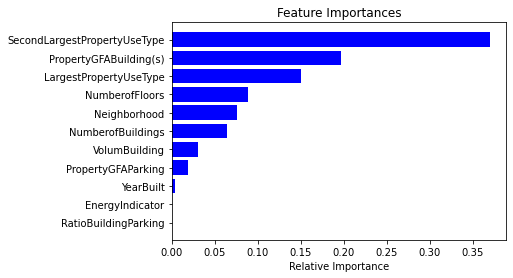

In [54]:
plot_feature_importance(XGBoost,X)

In [55]:
shap.initjs()

In [56]:
xgb_explainer1 = shap.TreeExplainer(XGBoost, X_train)

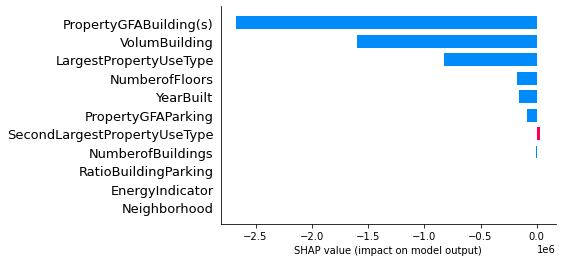

In [57]:
shap.bar_plot(xgb_explainer1.shap_values(X_test[0]),
              feature_names=X.columns,
              max_display=len(X.columns))

Hyperparamètre : max_depth , learning_rate, reg_alpha et reg_lambda :
        
- max_depth: Profondeur maximale d'un arbre.
- learning_rate:
- reg_alpha: Terme de régularisation L1 sur les poids
- reg_lambda:Terme de régularisation L2 sur les poids


###  Tableau de comparaison

In [58]:
'''grids = {
    'LinearRegression':grid_LR,
    'Lasso':grid_lasso,
    'Ridge':grid_ridge, 
    'Decision Tree':grid_DTree,
    'Random Forest':grid_Rforest,
    'XGboost':grid_XGboost
    }'''

"grids = {\n    'LinearRegression':grid_LR,\n    'Lasso':grid_lasso,\n    'Ridge':grid_ridge, \n    'Decision Tree':grid_DTree,\n    'Random Forest':grid_Rforest,\n    'XGboost':grid_XGboost\n    }"

In [59]:
grids = {
    'LinearRegression':lr,
    'Lasso':lasso,
    'Ridge':ridge, 
    'Decision Tree': DTree,
    'Random Forest':RForest,
    'XGboost': XGBoost
    }

In [60]:
def compare_regression_methods(grids, X_train, X_test, y_train, y_test):
    results = []
    for i, grid in enumerate(grids):
      
        y_pred = grids[grid].predict(X_test)
        r2_predict = r2_score(y_test, y_pred)
        MAE = mean_absolute_error(y_test, y_pred)
        MSE = mean_squared_error(y_test, y_pred)
        RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
        MedAE = median_absolute_error(y_test, y_pred)
        
    
        results.append([r2_predict,MAE,MSE,RMSE,MedAE])
    return pd.DataFrame(results, columns=["R2",'MAE','MSE','RMSE','MedAE'], index=grids.keys())

In [61]:
results = compare_regression_methods(grids,X_train, X_test, y_train, y_test)
results

,R2,MAE,MSE,RMSE,MedAE
LinearRegression,0.68490,4849317.94080,110537463560438.18750,10513679.82965,2660211.41976
Lasso,0.68717,4738187.66898,109741444071089.25000,10475755.05971,2563443.09897
Ridge,0.65672,4563585.36299,120422341884206.21875,10973711.39971,2305383.60155
Decision Tree,0.87867,3396214.16485,42562214318488.02344,6523972.28063,1295174.30114
Random Forest,0.85008,3609816.79435,52592470243828.15625,7252066.61882,1424224.74666
XGboost,0.88042,3298111.34948,41948395927191.96094,6476758.13407,1392969.93750


In [62]:
scores = pd.concat([baseline, results], keys=['Baseline', 'Optimize'])
scores

R2           MAE                   MSE  \
Baseline dummyRegressor   -0.00225 8027960.69774 351592759748737.25000   
Optimize LinearRegression  0.68490 4849317.94080 110537463560438.18750   
         Lasso             0.68717 4738187.66898 109741444071089.25000   
         Ridge             0.65672 4563585.36299 120422341884206.21875   
         Decision Tree     0.87867 3396214.16485  42562214318488.02344   
         Random Forest     0.85008 3609816.79435  52592470243828.15625   
         XGboost           0.88042 3298111.34948  41948395927191.96094   

                                    RMSE         MedAE  
Baseline dummyRegressor   18750806.90927 6401732.11227  
Optimize LinearRegression 10513679.82965 2660211.41976  
         Lasso            10475755.05971 2563443.09897  
         Ridge            10973711.39971 2305383.60155  
         Decision Tree     6523972.28063 1295174.30114  
         Random Forest     7252066.61882 1424224.74666  
         XGboost           6476758.13407 1392969.93750

### Visualisation

In [63]:
def graph(grids, X_train, X_test, y_train, y_test):
    for  i, model in enumerate(grids):
        y_pred = grids[model].predict(X_test)
        comparison = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred}).reset_index()
        sns.lmplot(x='y_test', y='y_pred',data=comparison )
        ax = plt.gca()
        ax.set_title(' métode {} \n'.format(model), fontweight="bold")
        plt.xlabel('y_test')
        plt.ylabel('y_pred')
        plt.show()

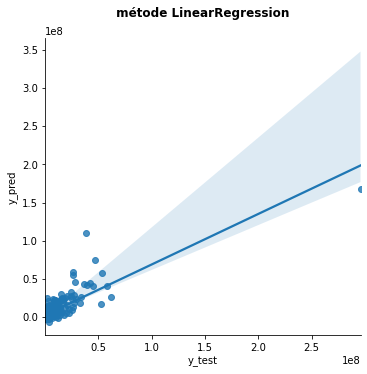

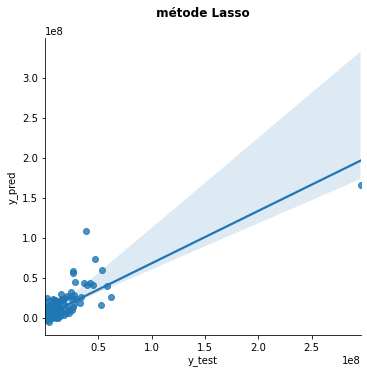

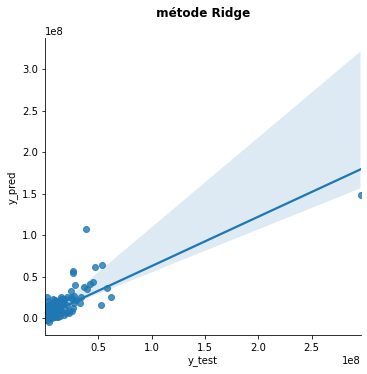

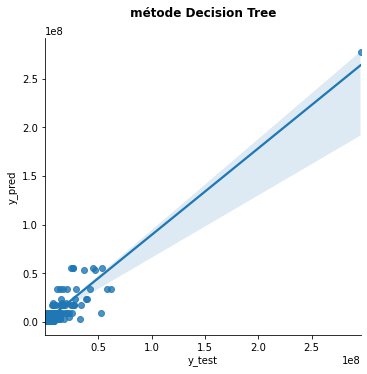

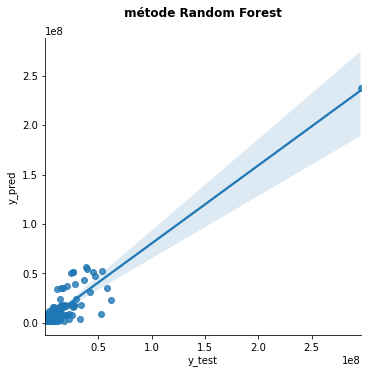

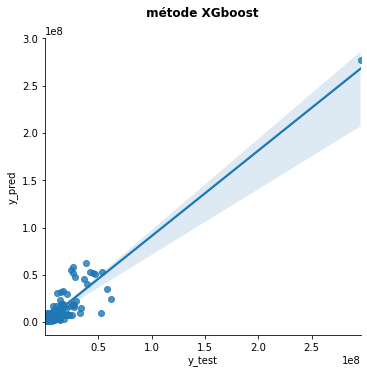

In [64]:
graph( grids,X_train, X_test, y_train, y_test)

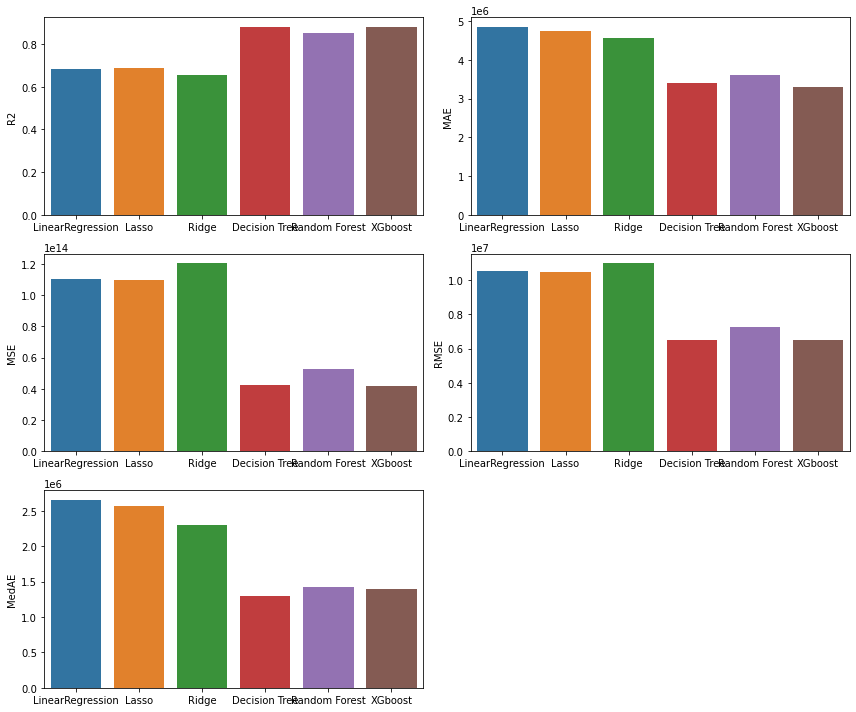

In [65]:
plt.subplots(figsize=(12, 10))
for index, column in enumerate(results.columns):
    plt.subplot(3, 2, index+1)
    sns.barplot(x=results.index, y=column, data=results)
    
plt.tight_layout()
plt.show()

les modèles les plus pertinants sont:
- XGboost
- Random Forest
- Decision Tree

In [66]:
print('best param de XGboost : ', grid_XGboost.best_params_)

best param de XGboost :  {'learning_rate': 0.1, 'max_depth': 2, 'reg_alpha': 12915.496650148827, 'reg_lambda': 0.001}


# SiteEneryUSE et EnergyStar Score

L'un de nos objectifs est de décider si la variable ENERGYSTAR est utile.

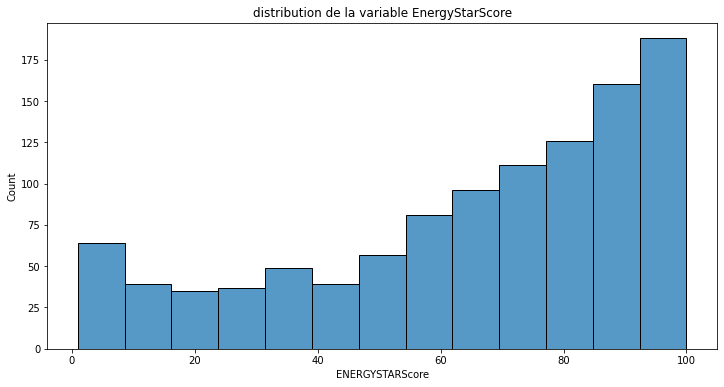

In [67]:
plt.figure(figsize=(12,6))
sns.histplot(data=df_data, x='ENERGYSTARScore').set_title("distribution de la variable EnergyStarScore");

In [21]:
var_to_predict

['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']

In [22]:
df_data["ENERGYSTARScore"].describe()

count   1082.00000
mean      65.15896
std       28.36984
min        1.00000
25%       48.00000
50%       73.00000
75%       89.00000
max      100.00000
Name: ENERGYSTARScore, dtype: float64

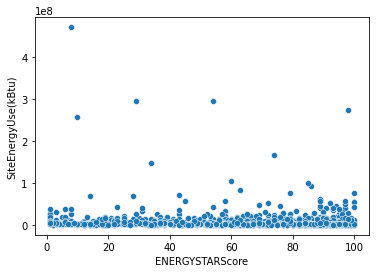

In [70]:
sns.scatterplot(data=df_data, x="ENERGYSTARScore", y="SiteEnergyUse(kBtu)")

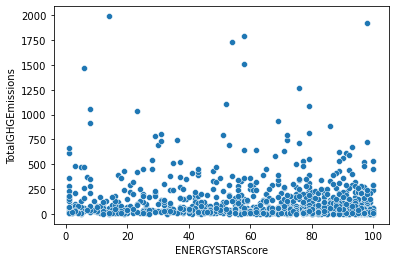

In [71]:
sns.scatterplot(data=df_data, x="ENERGYSTARScore", y="TotalGHGEmissions")

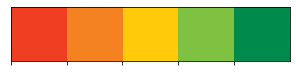

In [23]:
custom_palette = ["#ef3e22", "#f58220", '#feca0a', '#7fc241', "#008b4c"]
sns.palplot(custom_palette)

In [73]:
df_data['ENERGYSTARgroups']=pd.cut(x = df_data['ENERGYSTARScore'],
                        bins = [0,20,40,60,80,100], 
                        labels = [1, 2, 3,4,5])
df_data['ENERGYSTARgroups'].value_counts()

5    416
4    275
3    163
1    124
2    104
Name: ENERGYSTARgroups, dtype: int64

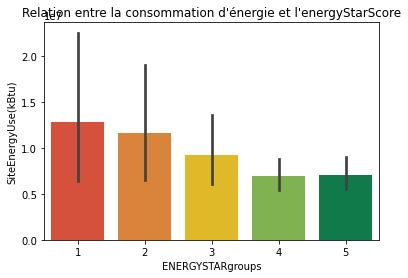

In [74]:
sns.barplot(data=df_data, x='ENERGYSTARgroups', y='SiteEnergyUse(kBtu)', palette=custom_palette).set_title("Relation entre la consommation d'énergie et l'energyStarScore");

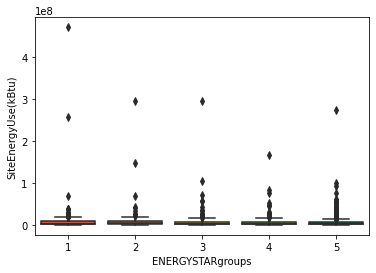

In [75]:
sns.boxplot(data=df_data, x='ENERGYSTARgroups', y='SiteEnergyUse(kBtu)', palette=custom_palette)


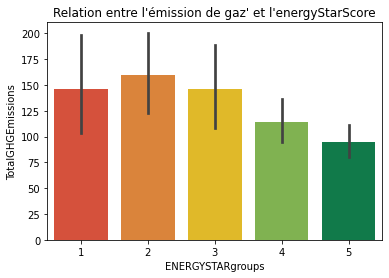

In [76]:
sns.barplot(data=df_data, x='ENERGYSTARgroups', y='TotalGHGEmissions', palette=custom_palette).set_title("Relation entre l'émission de gaz' et l'energyStarScore");

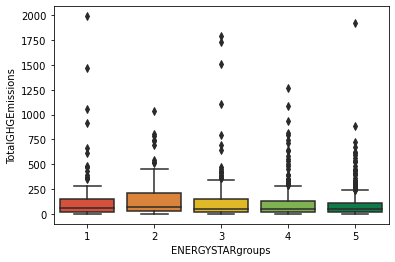

In [77]:
sns.boxplot(data=df_data, x='ENERGYSTARgroups', y='TotalGHGEmissions', palette=custom_palette)

Nous pouvons voir la corrélation entre le score ENERGYSTAR et la consommation d'énergie

In [78]:
df_data.isna().mean()

BuildingType                   0.00000
PrimaryPropertyType            0.00000
Neighborhood                   0.00000
YearBuilt                      0.00000
NumberofBuildings              0.00000
NumberofFloors                 0.00000
PropertyGFAParking             0.00000
PropertyGFABuilding(s)         0.00000
LargestPropertyUseType         0.00000
SecondLargestPropertyUseType   0.00000
ThirdLargestPropertyUseType    0.00000
ENERGYSTARScore                0.33782
SiteEnergyUse(kBtu)            0.00000
ComplianceStatus               0.00000
TotalGHGEmissions              0.00000
VolumBuilding                  0.00000
RatioBuildingParking           0.00000
EnergyIndicator                0.00000
ENERGYSTARgroups               0.33782
dtype: float64

supprimer les lignes où l'EnergyStarScore est nan 

In [24]:
df2 = df_data.dropna()

In [25]:
df2.shape[0]

1082

In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 0 to 1629
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   BuildingType                  1082 non-null   object  
 1   PrimaryPropertyType           1082 non-null   object  
 2   Neighborhood                  1082 non-null   object  
 3   YearBuilt                     1082 non-null   int64   
 4   NumberofBuildings             1082 non-null   float64 
 5   NumberofFloors                1082 non-null   int64   
 6   PropertyGFAParking            1082 non-null   int64   
 7   PropertyGFABuilding(s)        1082 non-null   int64   
 8   LargestPropertyUseType        1082 non-null   object  
 9   SecondLargestPropertyUseType  1082 non-null   object  
 10  ThirdLargestPropertyUseType   1082 non-null   object  
 11  ENERGYSTARScore               1082 non-null   float64 
 12  SiteEnergyUse(kBtu)           1082 non-null   fl

In [82]:
numeric_col_score = [
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ENERGYSTARScore',
 'VolumBuilding',
 'RatioBuildingParking',
 'EnergyIndicator'
]

In [83]:
categ_col

['Neighborhood', 'LargestPropertyUseType', 'SecondLargestPropertyUseType']

## Analyse de la variable 'SiteEnergyUse(kBtu)' (en utilisant le score)

In [84]:
X_score = df2[numeric_col_score+categ_col]

In [85]:
ys = df2['SiteEnergyUse(kBtu)']

In [86]:
ys_dist= pd.qcut(df2['SiteEnergyUse(kBtu)'],5)

### Séparez les données en données d'apprentissage et de test

In [87]:
X_trainS, X_testS, y_trainS, y_testS = train_test_split(X_score, ys, test_size=0.2, random_state = 2, stratify=ys_dist)

In [88]:
target_encoder = TargetEncoder()
X_trainS[categ_col] = target_encoder.fit_transform(X_trainS[categ_col],y_trainS,smoothing=10)


In [89]:
X_testS[categ_col]= target_encoder.transform(X_testS[categ_col],y_testS)
X_testS[categ_col]

,Neighborhood,LargestPropertyUseType,SecondLargestPropertyUseType
548,14248093.71478,10552433.83975,15501283.21782
812,8150229.33943,10552433.83975,15501283.21782
1109,10566062.81345,10552433.83975,6550801.87748
6,14248093.71478,10757737.03205,4995996.92253
171,10566062.81345,3206841.93132,4995996.92253
...,...,...,...
124,5639553.07058,1814244.69467,4995996.92253
313,5110819.16978,10552433.83975,15501283.21782
1481,5949549.51983,3696225.42139,4995996.92253
1015,5110819.16978,10552433.83975,15501283.21782


In [90]:
#normalisation
scaler = StandardScaler()
X_trainS = scaler.fit_transform(X_trainS)
X_testS = scaler.transform(X_testS)


### Dummy Regressor

In [91]:
estimator_dummy = DummyRegressor(strategy = "mean") 
estimator_dummy.fit(X_trainS,y_trainS)
y_predS = estimator_dummy.predict(X_testS)


In [94]:
baseline_results =[]
r2 = r2_score(y_testS, y_predS)
MSE = mean_squared_error(y_testS, y_predS)
MAE = mean_absolute_error(y_testS, y_predS)
RMSE = np.sqrt(mean_squared_error(y_testS, y_predS))
MedAE = median_absolute_error(y_testS, y_predS)

baseline_results.append([r2,MAE,MSE,RMSE,MedAE])
baseline_dummyS= pd.DataFrame(baseline_results, columns=["R2",'MAE','MSE','RMSE','MedAE'], index=['dummyRegressor'])
baseline_dummyS

,R2,MAE,MSE,RMSE,MedAE
dummyRegressor,-0.12197,7152728.63485,87914121213128.45312,9376253.04763,7018915.23997


### Linear Regression

In [95]:
grid_lr_withscore = apply_LinearRegression(X_trainS, y_trainS, X_testS, y_testS)

 Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement pour LinearRegression():  {'fit_intercept': True}
R2 = 0.024
MSE = 76476980937103.703


### LASSO

In [96]:
grid_lasso_withscore = apply_LASSO(X_trainS, y_trainS, X_testS, y_testS)

 Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement pour Lasso(random_state=2):  {'alpha': 100000.0}
R2 = 0.045
MSE = 74812404037632.469


### Ridge

In [97]:
grid_ridge_withscore = apply_ridge(X_trainS, y_trainS, X_testS, y_testS)

 Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement pour Ridge(random_state=2):  {'alpha': 517.9474679231213}
R2 = 0.450
MSE = 43072262176693.164


### Decision Tree

In [98]:
grid_DTree_withscore = apply_DTree(X_trainS, y_trainS, X_testS, y_testS)

 Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement pour DecisionTreeRegressor(random_state=2):  {'criterion': 'mse', 'max_depth': 5, 'min_samples_split': 2}
R2 = 0.337
MSE = 51929549237502.766


### Random Forest

In [99]:
grid_Rforest_withscore = apply_Rforest(X_trainS, y_trainS, X_testS, y_testS)

 Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement pour RandomForestRegressor(random_state=2):  {'criterion': 'mse', 'max_depth': 7, 'max_features': 'sqrt'}
R2 = 0.497
MSE = 39387022626557.016


### XGBoost

In [100]:
grid_XGboost_withscore = apply_XGboost(X_trainS, y_trainS, X_testS, y_testS)

 Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement pour XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=2, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None):  {'learning_rate': 1, 'max_depth': 2, 'reg_alpha': 100000.0, 'reg_lambda': 0.31622776601683794}
R2 = 0.723
MSE = 21719337579049.547


In [101]:
XGBoost__withScore = apply_XGBoost_best_params(grid_XGboost_withscore,X_trainS, y_trainS, X_testS, y_testS)

R2 = 0.723
MSE = 21719337579049.547


In [102]:
xgb_explainer__withScore = shap.TreeExplainer(XGBoost__withScore, X_trainS)

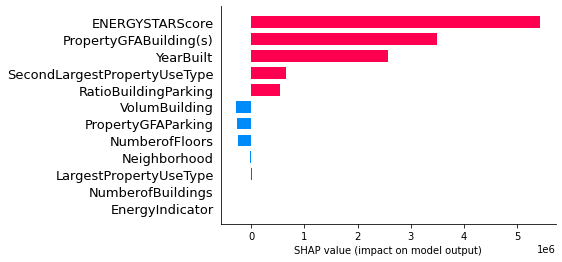

In [103]:
shap.bar_plot(xgb_explainer__withScore.shap_values( X_testS[0]),
              feature_names=X_score.columns,
              max_display=len(X_score.columns))

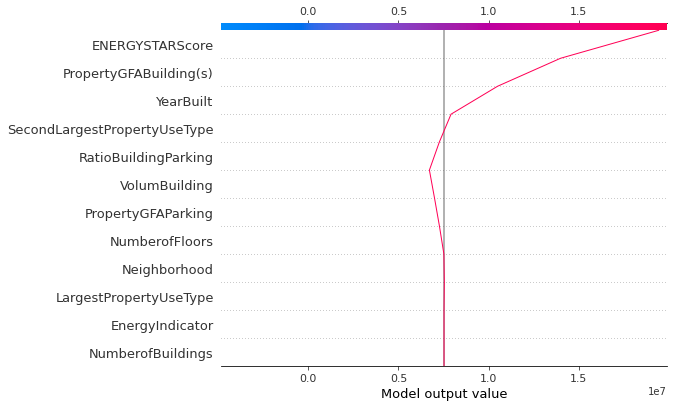

In [104]:
shap.decision_plot(xgb_explainer__withScore.expected_value,
                   xgb_explainer__withScore.shap_values(X_testS[0]),
                   feature_names = X_score.columns.tolist(),
                   )

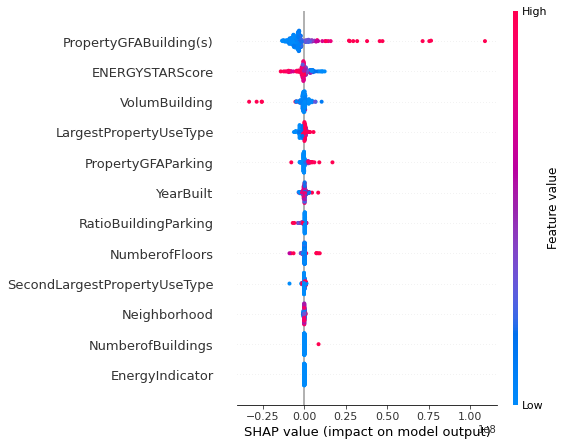

In [105]:
shap.summary_plot(xgb_explainer__withScore.shap_values(X_testS),
                  features = X_testS,
                  feature_names=X_score.columns)

### Sommaire des résultats obtenue en utilisant l'Energyscore (SiteEnergyUse)

In [106]:
grids_withscore = {
    'LinearRegression':grid_lr_withscore,
    'Lasso':grid_lasso_withscore,
    'Ridge':grid_ridge_withscore, 
    'Decision Tree':grid_DTree_withscore,
    'Random Forest':grid_Rforest_withscore,
    'XGboost':grid_XGboost_withscore
    
}


In [107]:
results_withscore_SiteEUSE = compare_regression_methods(grids_withscore,X_trainS, X_testS, y_trainS, y_testS)
results_withscore_SiteEUSE

,R2,MAE,MSE,RMSE,MedAE
LinearRegression,0.02400,5020258.86677,76476980937103.70312,8745111.83102,3493886.96809
Lasso,0.04524,4888320.70063,74812404037632.46875,8649416.39867,3379294.91573
Ridge,0.45031,3714755.13605,43072262176693.16406,6562946.15068,2346762.27765
Decision Tree,0.33727,3323353.52476,51929549237502.76562,7206216.01380,1346088.16730
Random Forest,0.49734,3162003.33334,39387022626557.01562,6275908.11170,1447158.35414
XGboost,0.72282,2833699.47865,21719337579049.54688,4660401.01054,1351620.34375


In [108]:
scores = pd.concat([baseline_dummyS, results_withscore_SiteEUSE], keys=['BaselineScore', 'OptimizeScore'])
scores

R2           MAE                  MSE  \
BaselineScore dummyRegressor   -0.12197 7152728.63485 87914121213128.45312   
OptimizeScore LinearRegression  0.02400 5020258.86677 76476980937103.70312   
              Lasso             0.04524 4888320.70063 74812404037632.46875   
              Ridge             0.45031 3714755.13605 43072262176693.16406   
              Decision Tree     0.33727 3323353.52476 51929549237502.76562   
              Random Forest     0.49734 3162003.33334 39387022626557.01562   
              XGboost           0.72282 2833699.47865 21719337579049.54688   

                                        RMSE         MedAE  
BaselineScore dummyRegressor   9376253.04763 7018915.23997  
OptimizeScore LinearRegression 8745111.83102 3493886.96809  
              Lasso            8649416.39867 3379294.91573  
              Ridge            6562946.15068 2346762.27765  
              Decision Tree    7206216.01380 1346088.16730  
              Random Forest    6275908.11170 1447158.35414  
              XGboost          4660401.01054 1351620.34375

### Visualisation

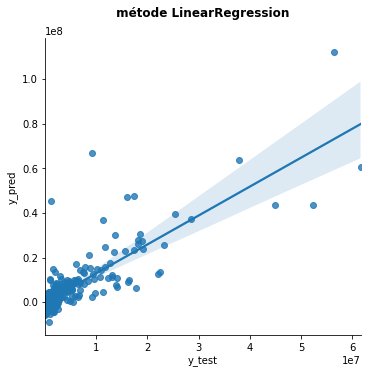

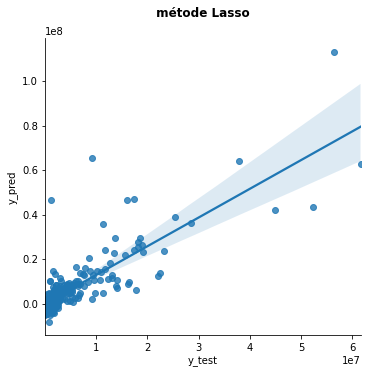

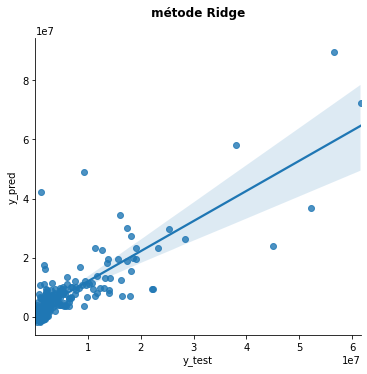

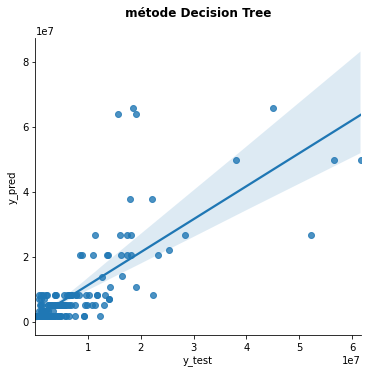

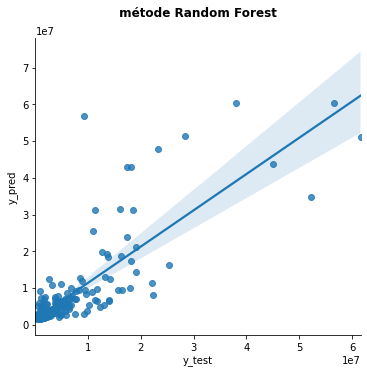

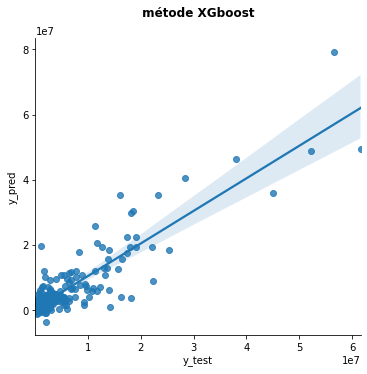

In [109]:
graph( grids_withscore,X_trainS, X_testS, y_trainS, y_testS)

## Analyse de la variable 'SiteEnergyUse(kBtu)' (Sans le score)

In [110]:
numeric_col

['YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'VolumBuilding',
 'RatioBuildingParking',
 'EnergyIndicator']

In [111]:
categ_col

['Neighborhood', 'LargestPropertyUseType', 'SecondLargestPropertyUseType']

In [112]:
X_Nscore = df2[numeric_col+categ_col]

In [113]:
yNs = df2['SiteEnergyUse(kBtu)']

### Séparez les données en données d'apprentissage et de test

In [114]:
X_trainNS, X_testNS, y_trainNS, y_testNS = train_test_split(X_Nscore, yNs, test_size=0.2, random_state=2, stratify=ys_dist)

In [115]:
target_encoder = TargetEncoder()
X_trainNS[categ_col] = target_encoder.fit_transform(X_trainNS[categ_col],y_trainNS,smoothing=10)
X_testNS[categ_col]= target_encoder.transform(X_testNS[categ_col],y_testNS)
X_testNS[categ_col]

,Neighborhood,LargestPropertyUseType,SecondLargestPropertyUseType
548,14248093.71478,10552433.83975,15501283.21782
812,8150229.33943,10552433.83975,15501283.21782
1109,10566062.81345,10552433.83975,6550801.87748
6,14248093.71478,10757737.03205,4995996.92253
171,10566062.81345,3206841.93132,4995996.92253
...,...,...,...
124,5639553.07058,1814244.69467,4995996.92253
313,5110819.16978,10552433.83975,15501283.21782
1481,5949549.51983,3696225.42139,4995996.92253
1015,5110819.16978,10552433.83975,15501283.21782


In [116]:
#normalisation
scaler = StandardScaler()
X_trainNS = scaler.fit_transform(X_trainNS)
X_testNS = scaler.transform(X_testNS)
X_testNS

array([[-1.34100209, -0.09664361,  1.01151028, ...,  1.1241035 ,
         0.16525711,  0.74200358],
       [-0.52094779, -0.09664361, -0.49508704, ..., -0.20384338,
         0.16525711,  0.74200358],
       [-1.78256979, -0.09664361, -0.24398748, ...,  0.3222586 ,
         0.16525711, -0.29243686],
       ...,
       [ 1.21378246, -0.09664361, -0.49508704, ..., -0.68309082,
        -0.60898207, -0.47213145],
       [ 0.61451201, -0.09664361, -0.11843771, ..., -0.86574318,
         0.16525711,  0.74200358],
       [-0.14246119, -0.09664361, -0.49508704, ..., -0.68309082,
        -0.66424583, -0.47213145]])

### Dummy regressor

In [117]:
estimator_dummy = DummyRegressor(strategy = "mean") 
estimator_dummy.fit(X_trainNS,y_trainNS)
y_predNS = estimator_dummy.predict(X_testNS)
baseline_results =[]
r2 = r2_score(y_testNS, y_predNS)
MSE = mean_squared_error(y_testNS, y_predNS)
MAE = mean_absolute_error(y_testNS, y_predNS)
RMSE = np.sqrt(mean_squared_error(y_testNS, y_predNS))
MedAE = median_absolute_error(y_testNS, y_predNS)

baseline_results.append([r2,MAE,MSE,RMSE,MedAE])
baseline_dummyNS= pd.DataFrame(baseline_results, columns=["R2",'MAE','MSE','RMSE','MedAE'], index=['dummyRegressor'])
baseline_dummyNS

,R2,MAE,MSE,RMSE,MedAE
dummyRegressor,-0.12197,7152728.63485,87914121213128.45312,9376253.04763,7018915.23997


### Linear Regression

In [118]:
grid_lr_withoutScore = apply_LinearRegression(X_trainNS, y_trainNS, X_testNS, y_testNS)

 Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement pour LinearRegression():  {'fit_intercept': True}
R2 = -0.060
MSE = 83087657997905.578


### LASSO

In [119]:
grid_lasso_withoutScore = apply_LASSO(X_trainNS, y_trainNS, X_testNS, y_testNS)

 Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement pour Lasso(random_state=2):  {'alpha': 100000.0}
R2 = -0.039
MSE = 81419564289508.141


### Ridge

In [120]:
grid_ridge_withoutScore = apply_ridge(X_trainNS, y_trainNS, X_testNS, y_testNS)

 Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement pour Ridge(random_state=2):  {'alpha': 517.9474679231213}
R2 = 0.403
MSE = 46804678339479.180


### Descision Tree

In [121]:
grid_DTree_withoutScore = apply_DTree(X_trainNS, y_trainNS, X_testNS, y_testNS)

 Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement pour DecisionTreeRegressor(random_state=2):  {'criterion': 'mse', 'max_depth': 5, 'min_samples_split': 2}
R2 = 0.346
MSE = 51245684624199.391


### Random Forest

In [122]:
grid_Rforest_withoutScore = apply_Rforest(X_trainNS, y_trainNS, X_testNS, y_testNS)

 Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement pour RandomForestRegressor(random_state=2):  {'criterion': 'mse', 'max_depth': 20, 'max_features': 'sqrt'}
R2 = 0.405
MSE = 46641351428188.000


### XGBoost

In [123]:
grid_XGboost_withoutScore = apply_XGboost(X_trainNS, y_trainNS, X_testNS, y_testNS)

 Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement pour XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=2, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None):  {'learning_rate': 0.1, 'max_depth': 4, 'reg_alpha': 12915.496650148827, 'reg_lambda': 0.01778279410038923}
R2 = 0.526
MSE = 37105061889759.305


In [124]:
XGBoost__withoutScore = apply_XGBoost_best_params(grid_XGboost_withoutScore,X_trainNS, y_trainNS, X_testNS, y_testNS)

R2 = 0.526
MSE = 37105061889759.305


In [125]:
xgb_explainer__withoutScore = shap.TreeExplainer(XGBoost__withoutScore, X_trainNS)

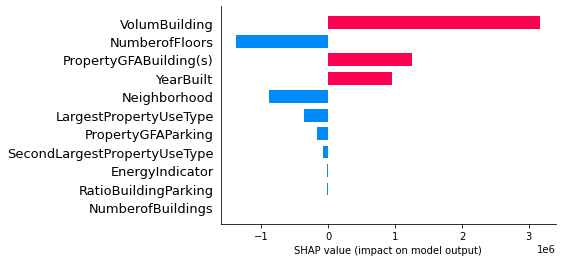

In [126]:
shap.bar_plot(xgb_explainer__withoutScore.shap_values( X_testNS[0]),
              feature_names=X_Nscore.columns,
              max_display=len(X_Nscore.columns))

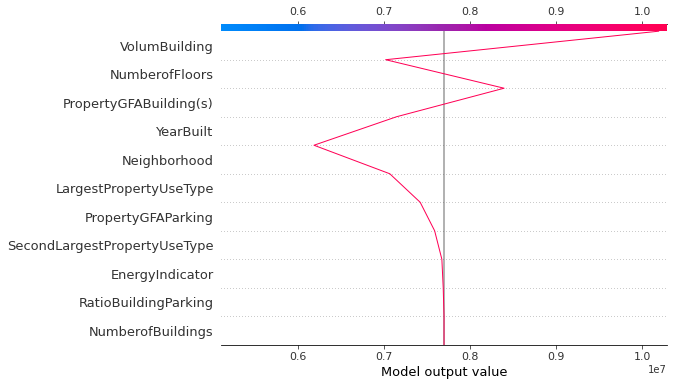

In [127]:
shap.decision_plot(xgb_explainer__withoutScore.expected_value,
                   xgb_explainer__withoutScore.shap_values(X_testNS[0]),
                   feature_names = X_Nscore.columns.tolist(),
                   )

In [ ]:
#grid_XGboost_withoutScore =  apply_XGBoost_best_params(grid_XGboost,X_trainNS, y_trainNS, X_testNS, y_testNS)

In [ ]:
#plot_feature_importance(grid_XGboost_withoutScore,X_Nscore)

### Sommaire des résultats obtenue sans utiliser l'Energyscore (SiteEnergyUse)

In [128]:
grids_withoutScore = {
    'LinearRegression':grid_lr_withoutScore,
    'Lasso':grid_lasso_withoutScore,
    'Ridge':grid_ridge_withoutScore, 
    'Decision Tree':grid_DTree_withoutScore,
    'Random Forest':grid_Rforest_withoutScore,
    'XGboost':grid_XGboost_withoutScore
    
}

In [129]:
results_withoutScore_SiteEUSE = compare_regression_methods(grids_withoutScore,X_trainNS, X_testNS, y_trainNS, y_testNS)
results_withoutScore_SiteEUSE

,R2,MAE,MSE,RMSE,MedAE
LinearRegression,-0.06037,5007862.55703,83087657997905.57812,9115243.16724,2813220.84584
Lasso,-0.03908,4895027.24069,81419564289508.14062,9023279.02093,2726722.80277
Ridge,0.40268,3792535.97986,46804678339479.17969,6841394.47331,1750188.62561
Decision Tree,0.34600,3389492.47709,51245684624199.39062,7158609.12637,1432453.87500
Random Forest,0.40476,3278011.43911,46641351428188.00000,6829447.37356,1394533.67639
XGboost,0.52646,3166635.33172,37105061889759.30469,6091392.44260,1239524.37500


In [130]:
scores_SiteEUSE = pd.concat([results_withscore_SiteEUSE, results_withoutScore_SiteEUSE], keys=['Score', 'NoScore'])
scores_SiteEUSE

R2           MAE                  MSE  \
Score   LinearRegression  0.02400 5020258.86677 76476980937103.70312   
        Lasso             0.04524 4888320.70063 74812404037632.46875   
        Ridge             0.45031 3714755.13605 43072262176693.16406   
        Decision Tree     0.33727 3323353.52476 51929549237502.76562   
        Random Forest     0.49734 3162003.33334 39387022626557.01562   
        XGboost           0.72282 2833699.47865 21719337579049.54688   
NoScore LinearRegression -0.06037 5007862.55703 83087657997905.57812   
        Lasso            -0.03908 4895027.24069 81419564289508.14062   
        Ridge             0.40268 3792535.97986 46804678339479.17969   
        Decision Tree     0.34600 3389492.47709 51245684624199.39062   
        Random Forest     0.40476 3278011.43911 46641351428188.00000   
        XGboost           0.52646 3166635.33172 37105061889759.30469   

                                  RMSE         MedAE  
Score   LinearRegression 8745111.83102 3493886.96809  
        Lasso            8649416.39867 3379294.91573  
        Ridge            6562946.15068 2346762.27765  
        Decision Tree    7206216.01380 1346088.16730  
        Random Forest    6275908.11170 1447158.35414  
        XGboost          4660401.01054 1351620.34375  
NoScore LinearRegression 9115243.16724 2813220.84584  
        Lasso            9023279.02093 2726722.80277  
        Ridge            6841394.47331 1750188.62561  
        Decision Tree    7158609.12637 1432453.87500  
        Random Forest    6829447.37356 1394533.67639  
        XGboost          6091392.44260 1239524.37500

In [131]:
total_score = pd.concat([scores_SiteEUSE], keys=['SiteEnergyUse'])
total_score

R2           MAE  \
SiteEnergyUse Score   LinearRegression  0.02400 5020258.86677   
                      Lasso             0.04524 4888320.70063   
                      Ridge             0.45031 3714755.13605   
                      Decision Tree     0.33727 3323353.52476   
                      Random Forest     0.49734 3162003.33334   
                      XGboost           0.72282 2833699.47865   
              NoScore LinearRegression -0.06037 5007862.55703   
                      Lasso            -0.03908 4895027.24069   
                      Ridge             0.40268 3792535.97986   
                      Decision Tree     0.34600 3389492.47709   
                      Random Forest     0.40476 3278011.43911   
                      XGboost           0.52646 3166635.33172   

                                                        MSE          RMSE  \
SiteEnergyUse Score   LinearRegression 76476980937103.70312 8745111.83102   
                      Lasso            74812404037632.46875 8649416.39867   
                      Ridge            43072262176693.16406 6562946.15068   
                      Decision Tree    51929549237502.76562 7206216.01380   
                      Random Forest    39387022626557.01562 6275908.11170   
                      XGboost          21719337579049.54688 4660401.01054   
              NoScore LinearRegression 83087657997905.57812 9115243.16724   
                      Lasso            81419564289508.14062 9023279.02093   
                      Ridge            46804678339479.17969 6841394.47331   
                      Decision Tree    51245684624199.39062 7158609.12637   
                      Random Forest    46641351428188.00000 6829447.37356   
                      XGboost          37105061889759.30469 6091392.44260   

                                               MedAE  
SiteEnergyUse Score   LinearRegression 3493886.96809  
                      Lasso            3379294.91573  
                      Ridge            2346762.27765  
                      Decision Tree    1346088.16730  
                      Random Forest    1447158.35414  
                      XGboost          1351620.34375  
              NoScore LinearRegression 2813220.84584  
                      Lasso            2726722.80277  
                      Ridge            1750188.62561  
                      Decision Tree    1432453.87500  
                      Random Forest    1394533.67639  
                      XGboost          1239524.37500